In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import os

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.rcParams.update({"text.usetex": True})
mpl.rcParams['text.usetex'] = True

In [3]:
index_type = 'lipp'
NS_TO_MS = 1 / 1e6
NS_TO_S = 1 / 1e9
QPS_TO_MQPS = 1 / 1e6
NUM_QUERIES = 500000000

In [4]:
def save_fig(fig, filename):
    fig.savefig(os.path.join('/home/grad2/ndhuynh/transfer', filename), dpi=300, format='pdf', bbox_inches='tight')

In [5]:
with sqlite3.connect("../experiment_feb_29.db") as con:
    table_bliss = pd.read_sql(f"SELECT * FROM bliss_bench", con)
    table_rocks = pd.read_sql(f"SELECT * FROM rocksdb_bliss", con)

In [6]:
table_bliss["preload_tp"] = (table_bliss["preload_factor"] * NUM_QUERIES / (table_bliss["preload_time"] * NS_TO_S)) * QPS_TO_MQPS
table_bliss["write_tp"] = (table_bliss["write_factor"] * NUM_QUERIES / (table_bliss["write_time"] * NS_TO_S)) * QPS_TO_MQPS
table_bliss["read_tp"] = (table_bliss["read_factor"] * NUM_QUERIES / (table_bliss["read_time"] * NS_TO_S)) * QPS_TO_MQPS
table_bliss["mixed_tp"] = (table_bliss["mixed_ratio"] * NUM_QUERIES / (table_bliss["mixed_time"] * NS_TO_S)) * QPS_TO_MQPS
table_bliss["total_tp"] = table_bliss[["preload_tp", "write_tp", "read_tp", "mixed_tp"]].sum(axis=1)

In [7]:
table_bliss.file_name

0          ../data/data_N500000000_k1_l1.bin
1          ../data/data_N500000000_k1_l1.bin
2          ../data/data_N500000000_k1_l3.bin
3          ../data/data_N500000000_k1_l3.bin
4          ../data/data_N500000000_k1_l5.bin
                       ...                  
537     ../data/data_N500000000_k100_l25.bin
538      ../data/data_N500000000_k100_l3.bin
539      ../data/data_N500000000_k100_l5.bin
540     ../data/data_N500000000_k100_l50.bin
541    ../data/data_N500000000_k100_l100.bin
Name: file_name, Length: 542, dtype: object

In [8]:
table_alex = table_bliss.query("use_preload == 1 and index_type == 'alex'")
table_lipp = table_bliss.query("use_preload == 1 and index_type == 'lipp'")

In [9]:
table_bliss.describe()

,id,k_pt,l_pt,preload_factor,write_factor,read_factor,mixed_ratio,use_preload,preload_time,preload_creation_time,write_time,mixed_time,read_time,preload_tp,write_tp,read_tp,mixed_tp,total_tp
count,542.000000,542.000000,542.000000,5.420000e+02,5.420000e+02,5.420000e+02,542.0,542.000000,5.420000e+02,5.420000e+02,5.420000e+02,5.420000e+02,5.420000e+02,542.000000,542.000000,542.000000,542.000000,542.000000
mean,299.016605,25.381919,27.271218,4.000000e-01,4.000000e-01,2.000000e-01,0.5,0.743542,2.696026e+10,1.412333e+10,6.433762e+10,2.514420e+10,1.017047e+10,inf,inf,inf,inf,inf
std,178.377991,31.941951,33.625785,3.667120e-15,3.667120e-15,1.833560e-15,0.0,0.437081,2.724587e+10,6.296157e+09,3.712270e+10,1.656842e+10,1.218867e+10,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,4.000000e-01,4.000000e-01,2.000000e-01,0.5,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.158992,0.732848,1.203451,1.929079,5.609081
25%,136.250000,3.000000,3.000000,4.000000e-01,4.000000e-01,2.000000e-01,0.5,0.000000,5.353696e+09,8.133732e+09,3.926867e+10,1.667700e+10,4.977708e+09,5.538853,2.520852,13.708928,8.984875,39.101393
50%,315.500000,10.000000,10.000000,4.000000e-01,4.000000e-01,2.000000e-01,0.5,1.000000,2.348714e+10,1.405720e+10,5.826245e+10,2.041606e+10,6.091128e+09,8.515299,3.432744,16.417710,12.245263,45.299632
75%,456.750000,50.000000,50.000000,4.000000e-01,4.000000e-01,2.000000e-01,0.5,1.000000,3.610858e+10,1.701868e+10,7.933827e+10,2.782483e+10,7.294517e+09,37.362194,5.093132,20.089568,14.990707,77.320924
max,592.000000,100.000000,100.000000,4.000000e-01,4.000000e-01,2.000000e-01,0.5,1.000000,1.725638e+11,3.028995e+10,2.729080e+11,1.295955e+11,8.309435e+10,inf,inf,inf,inf,inf


In [10]:
table_rocks.describe()

,id,k_pt,l_pt,ingestion_time,num_inserts,bytes_written,num_compactions,num_files_trivial,bytes_moved_trivial,trivial_if_cond_accesses
count,50.00000,50.000000,50.000000,5.000000e+01,50.0,5.000000e+01,50.000000,50.000000,5.000000e+01,50.000000
mean,25.50000,27.160000,27.160000,1.911103e+12,500000000.0,1.400000e+10,601.960000,78.520000,2.407257e+09,71.100000
std,14.57738,33.787064,33.787064,1.795025e+11,0.0,0.000000e+00,89.544872,71.297377,1.803585e+09,39.860087
min,1.00000,0.000000,0.000000,1.300152e+12,500000000.0,1.400000e+10,297.000000,30.000000,5.779372e+08,29.000000
25%,13.25000,3.000000,3.000000,1.781402e+12,500000000.0,1.400000e+10,570.000000,40.250000,1.397637e+09,40.000000
50%,25.50000,10.000000,10.000000,1.941513e+12,500000000.0,1.400000e+10,584.500000,63.000000,2.002624e+09,62.000000
75%,37.75000,50.000000,50.000000,2.053827e+12,500000000.0,1.400000e+10,623.250000,97.500000,2.917789e+09,95.750000
max,50.00000,100.000000,100.000000,2.209895e+12,500000000.0,1.400000e+10,849.000000,524.000000,1.297666e+10,258.000000


In [11]:
def plot_heatmap(df: pd.DataFrame, value: str = 'preload_time', data_scale=1, fillna=False, ax = None, **heatmap_kwargs):
    data = df.pivot_table(index='l_pt', columns='k_pt', values=value, aggfunc='mean')
    data = data * data_scale
    if fillna:
        data.iloc[-1] = data.iloc[-1].fillna(data.iloc[-1][100])
        data.loc[:, 100] = data.loc[:, 100].fillna(data.iloc[-1][100])
        data.loc[0, :] = data.loc[0][0]
        data.loc[:, 0] = data.loc[0][0]
   
    if ax is None:
        ax = sns.heatmap(data, **heatmap_kwargs)
    else:
        sns.heatmap(data, ax=ax, **heatmap_kwargs)
    _ = ax.invert_yaxis()
    _ = ax.set(xticklabels=data.columns.map(int), yticklabels=data.index.map(int))
    _ = ax.set(xlabel='K', ylabel='L')
    
    return ax, data

In [12]:
def set_style(fsz=14):
    plt.rc('axes', titlesize=fsz)
    plt.rc('axes', labelsize=fsz)
    plt.rc('xtick', labelsize=fsz)
    plt.rc('ytick', labelsize=fsz)
    plt.rc('legend', fontsize=fsz)
    plt.rc('figure', titlesize=fsz)

In [28]:
table_rocks["ingestion_qps"] = (table_rocks["num_inserts"] / (table_rocks["ingestion_time"] * NS_TO_S))
table_rocks["kqps"] = table_rocks["ingestion_qps"] / 1e3
table_rocks["trivial_move_pt"] = table_rocks["num_files_trivial"] / (table_rocks["num_compactions"] + table_rocks["num_files_trivial"])

In [29]:
(1 << 30) / 1e9

1.073741824

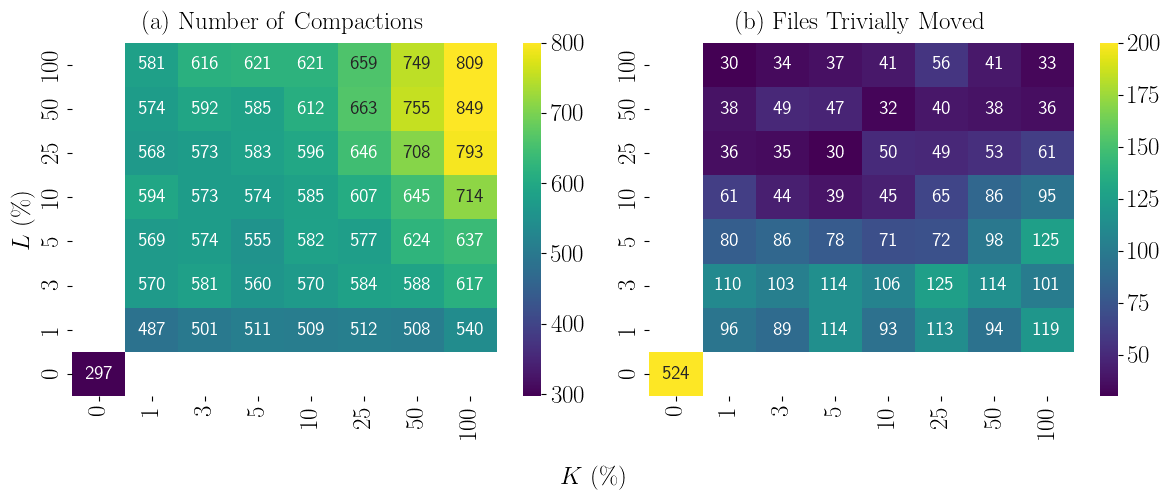

In [30]:
df = table_rocks
fontsize = 18
set_style(fsz=fontsize)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for value, ax in [("num_compactions",  axes[0]), ("num_files_trivial",  axes[1])]:
    data = df.pivot_table(index='l_pt', columns='k_pt', values=value, aggfunc='mean')
    vmax = 800 if value == "num_compactions" else 200
    sns.heatmap(data, ax=ax, annot=True, vmax=vmax, fmt='.0f', cbar=True, cmap='viridis', annot_kws={"size": 14})
    ax.invert_yaxis()
    ax.set_xlabel("", fontsize=fontsize)
    ax.set_ylabel("$L\ (\%)$", fontsize=fontsize) if ax == axes[0] else ax.set_ylabel("")
    ax.set_xticklabels(data.columns.map(lambda x: f"${x:.0f}$"), fontsize=fontsize)
    ax.set_yticklabels(data.index.map(lambda x: f"${x:.0f}$"), fontsize=fontsize)
    title = r'$\mathrm{(a)\ Number\ of\ Compactions}$' if ax == axes[0] else r"$\mathrm{(b)\ Files\ Trivially\ Moved}$"
    ax.set_title(title, pad=10) 
fig.supxlabel("$K\ (\%)$", fontsize=fontsize)
plt.tight_layout()

save_fig(fig, "rocksdb_trivial.pdf")

In [47]:
from matplotlib.ticker import FuncFormatter

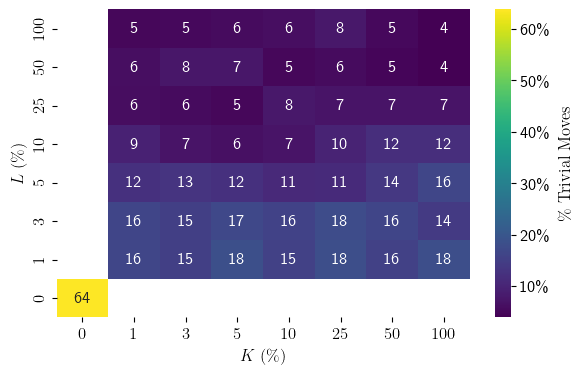

In [85]:
df = table_rocks
fontsize = 12
set_style(fsz=fontsize)
fig, ax = plt.subplots(figsize=(6.66, 4))

data = df.pivot_table(index='l_pt', columns='k_pt', values="trivial_move_pt", aggfunc='mean')
# data = (df.num_inserts.loc[0] / (data * NS_TO_S)) / 1e3  # throughput

formatter = FuncFormatter(lambda x, _: r"{:.0%}".format(x).replace("%", r"\%"))
sns.heatmap(data, ax=ax, annot=True, fmt='.0%', cmap='viridis', cbar_kws={"location": "right", "format": formatter}, annot_kws={"size": 12})
ax.invert_yaxis()
ax.set_xlabel("$K\ (\%)$", fontsize=fontsize)
ax.set_ylabel("$L\ (\%)$", fontsize=fontsize)
ax.set_xticklabels(data.columns.map(lambda x: f"${x:.0f}$"), fontsize=fontsize)
ax.set_yticklabels(data.index.map(lambda x: f"${x:.0f}$"), fontsize=fontsize)
ax.collections[0].colorbar.set_label(r"$\mathrm{\%\ Trivial\ Moves}$", labelpad=6)
for t in ax.texts: t.set_text(t.get_text() + r"\%")
save_fig(fig, "rocksdb_trivial_move_pt.pdf")

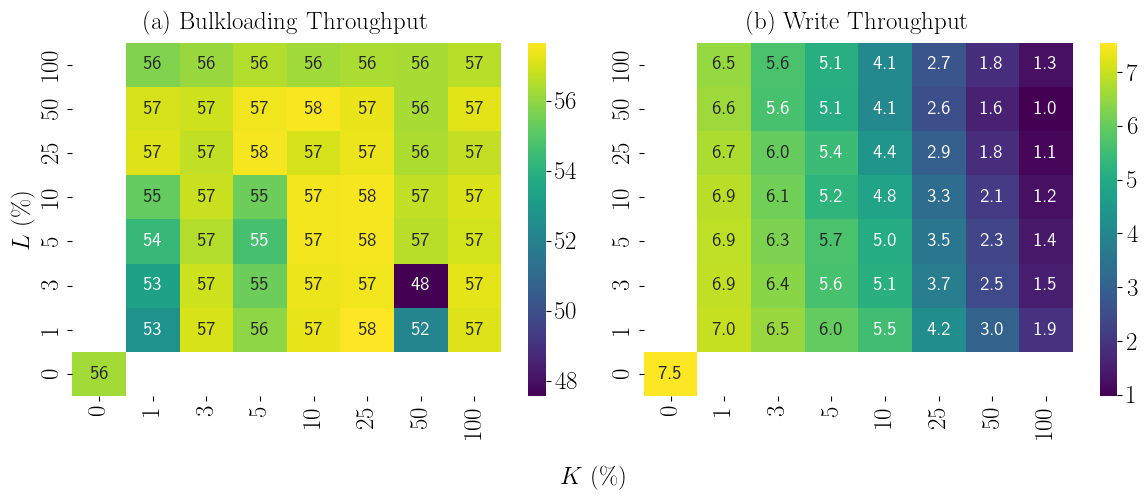

In [18]:
df = table_bliss.query("use_preload == 1 and index_type == 'btree'")

fontsize = 18
set_style(fsz=fontsize)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for value, ax in [("preload_tp",  axes[0]), ("write_tp",  axes[1])]:
    data = df.pivot_table(index='l_pt', columns='k_pt', values=value, aggfunc='mean')
    # vmax = 800 if value == "num_compactions" else 200
    fmt = '.0f' if value == 'preload_tp' else '.1f'
    sns.heatmap(data, ax=ax, annot=True, fmt=fmt, cbar=True, cmap='viridis', annot_kws={"size": 14})
    ax.invert_yaxis()
    ax.set_xlabel("", fontsize=fontsize)
    ax.set_ylabel("$L\ (\%)$", fontsize=fontsize) if ax == axes[0] else ax.set_ylabel("")
    ax.set_xticklabels(data.columns.map(lambda x: f"${x:.0f}$"), fontsize=fontsize)
    ax.set_yticklabels(data.index.map(lambda x: f"${x:.0f}$"), fontsize=fontsize)
    title = r'$\mathrm{(a)\ Bulkloading\ Throughput}$' if ax == axes[0] else r"$\mathrm{(b)\ Write\ Throughput}$"
    ax.set_title(title, pad=10) 
fig.supxlabel("$K\ (\%)$", fontsize=fontsize)
plt.tight_layout()

save_fig(fig, "btree_preload_write.pdf")

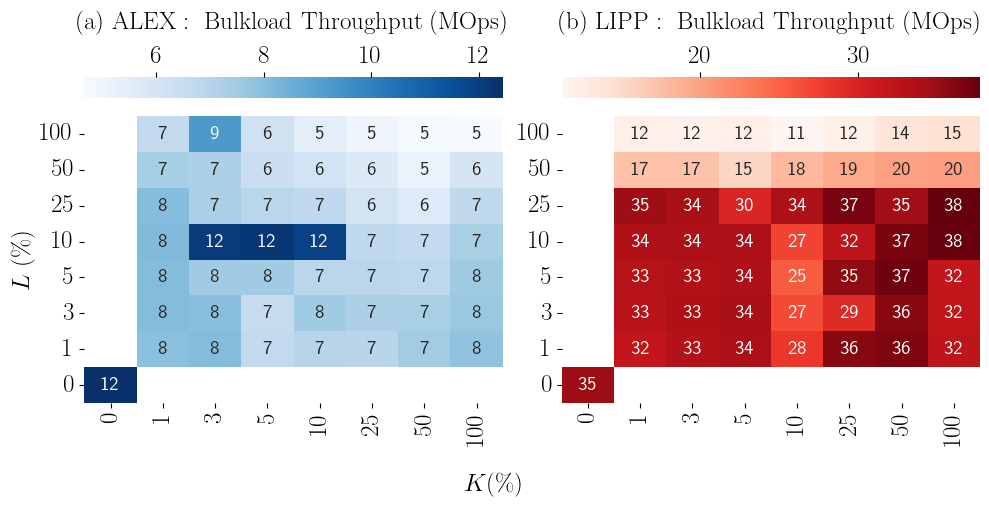

In [19]:
talex = table_bliss.query("index_type == 'alex' and use_preload == 1")
tlipp = table_bliss.query("index_type == 'lipp' and use_preload == 1")

fontsize = 18
set_style(fsz=fontsize)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
value = "preload_tp"
for index, df, ax in [("alex", talex, axes[0]), ("lipp", tlipp, axes[1])]:
    heatmap_kwargs = {'annot': True, 'fmt': '.0f', 'cmap': 'Blues'}
    heatmap_kwargs['cmap'] = 'Blues' if index == "alex" else "Reds"
    data = df.pivot_table(index='l_pt', columns='k_pt', values=value, aggfunc='mean')
    if data.loc[0, 0] == float("inf"):
        data.loc[0, 0] = -1
    sns.heatmap(data, ax=ax, cbar=True, cbar_kws={"location": "top"}, annot_kws={"size": 14}, **heatmap_kwargs)
    ax.invert_yaxis()
    ax.set_ylabel("$L\ (\%)$", fontsize=fontsize) if index == "alex" else ax.set_ylabel("")
    ax.set_xlabel("", fontsize=fontsize)
    ax.set_xticklabels(data.columns.map(lambda x: f"${x:.0f}$"), fontsize=fontsize)
    ax.set_yticklabels(data.index.map(lambda x: f"${x:.0f}$"), fontsize=fontsize)
axes[0].collections[0].colorbar.set_label(r"$\mathrm{(a)\ ALEX:\ Bulkload\ Throughput\ (MOps)}$", labelpad=12, fontsize=fontsize)
axes[1].collections[0].colorbar.set_label(r"$\mathrm{(b)\ LIPP:\ Bulkload\ Throughput\ (MOps)}$", labelpad=12, fontsize=fontsize)
fig.supxlabel("$K (\%)$", fontsize=fontsize)
plt.tight_layout()

save_fig(fig, "learned_index_bulkload.pdf")

In [20]:
# talex = table_bliss.query("index_type == 'alex' and use_preload == 0")
# tlipp = table_bliss.query("index_type == 'lipp' and use_preload == 0")

# fontsize = 18
# set_style(fsz=fontsize)
# fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# value = "write_tp"

# for index, df, ax in [("alex", talex, axes[0]), ("lipp", tlipp, axes[1])]:
#     heatmap_kwargs = {'annot': True, 'fmt': '.1f', 'cmap': 'Blues'}
#     heatmap_kwargs['cmap'] = "Blues" if index == "alex" else "Reds"
#     data = df.pivot_table(index='l_pt', columns='k_pt', values=value, aggfunc='mean')
#     if index == "lipp":
#         data.loc[0, 0] = -1
#     sns.heatmap(data, ax=ax, cbar=True, cbar_kws={"location": "top"}, annot_kws={"size": 14}, **heatmap_kwargs)
#     ax.invert_yaxis()
#     ax.set_ylabel("L", fontsize=fontsize) if index == "alex" else ax.set_ylabel("")
#     ax.set_xlabel("", fontsize=fontsize)
#     ax.set_xticklabels(data.columns.map(lambda x: f"${x:.0f}$"), fontsize=fontsize)
#     ax.set_yticklabels(data.index.map(lambda x: f"${x:.0f}$"), fontsize=fontsize)
    
# axes[0].collections[0].colorbar.set_label("ALEX: Writes With Preload Inserts (MOps)", labelpad=12, fontsize=fontsize)
# axes[1].collections[0].colorbar.set_label("LIPP: Writes With Preload Inserts (MOps)", labelpad=12, fontsize=fontsize)
# fig.supxlabel("K", fontsize=fontsize)
# plt.tight_layout()

In [21]:
# def plot_dual_heatmaps_alex_lipp(query_alex, query_lipp, **kwargs):
#     talex = table_bliss.query(query_alex)
#     tlipp = table_bliss.query(query_lipp)

#     set_style(fsz=kwargs.get("fsz", 18))
#     fig, axes = plt.subplots(1, 2, figsize=(10, 5))
#     value = kwargs.get("value", "write_tp")

#     for index, df, ax in [("alex", talex, axes[0]), ("lipp", tlipp, axes[1])]:
#         heatmap_kwargs = {'annot': kwargs.get("annot", True), 'fmt': '.0f', 'cmap': 'Blues'}
#         heatmap_kwargs['cmap'] = "Blues" if index == "alex" else "Reds"
#         heatmap_kwargs["fmt"] = '.1f' if index == "alex" else '.0f'
#         data = df.pivot_table(index='l_pt', columns='k_pt', values=value, aggfunc='mean')
#         if index == "lipp":
#             data.loc[0, 0] = -1
#         sns.heatmap(data, ax=ax, cbar=True, cbar_kws={"location": "top"}, annot_kws={"size": 14}, **heatmap_kwargs)
#         ax.invert_yaxis()
#         ax.set_ylabel("$L\ (\%)$", fontsize=fontsize) if index == "alex" else ax.set_ylabel("")
#         ax.set_xlabel("", fontsize=fontsize)
#         ax.set_xticklabels(data.columns.map(lambda x: f"${x:.0f}$"), fontsize=fontsize)
#         ax.set_yticklabels(data.index.map(lambda x: f"${x:.0f}$"), fontsize=fontsize)

#     axes[0].collections[0].colorbar.set_label(r"$\mathrm{ALEX:\ Write\ Throughput\ (MOps)}$", labelpad=12, fontsize=fontsize)
#     axes[1].collections[0].colorbar.set_label(r"$\mathrm{LIPP:\ Write\ Throughput\ (MOps)}$", labelpad=12, fontsize=fontsize)
#     fig.supxlabel("$K\ (\%)$", fontsize=fontsize)
#     plt.tight_layout()
    
#     return fig, axes

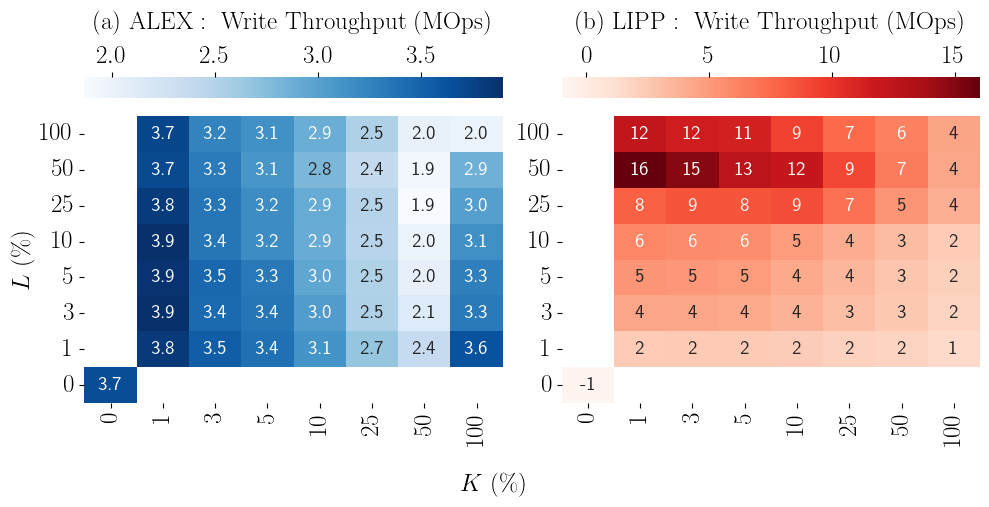

In [22]:
talex = table_bliss.query("index_type == 'alex' and use_preload == 1")
tlipp = table_bliss.query("index_type == 'lipp' and use_preload == 1")

fontsize = 18
set_style(fsz=fontsize)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
value = "write_tp"

for index, df, ax in [("alex", talex, axes[0]), ("lipp", tlipp, axes[1])]:
    heatmap_kwargs = {'annot': True, 'fmt': '.0f', 'cmap': 'Blues'}
    heatmap_kwargs['cmap'] = "Blues" if index == "alex" else "Reds"
    heatmap_kwargs["fmt"] = '.1f' if index == "alex" else '.0f'
    data = df.pivot_table(index='l_pt', columns='k_pt', values=value, aggfunc='mean')
    if index == "lipp":
        data.loc[0, 0] = -1
    sns.heatmap(data, ax=ax, cbar=True, cbar_kws={"location": "top"}, annot_kws={"size": 14}, **heatmap_kwargs)
    ax.invert_yaxis()
    ax.set_ylabel("$L\ (\%)$", fontsize=fontsize) if index == "alex" else ax.set_ylabel("")
    ax.set_xlabel("", fontsize=fontsize)
    ax.set_xticklabels(data.columns.map(lambda x: f"${x:.0f}$"), fontsize=fontsize)
    ax.set_yticklabels(data.index.map(lambda x: f"${x:.0f}$"), fontsize=fontsize)
    
axes[0].collections[0].colorbar.set_label(r"$\mathrm{(a)\ ALEX:\ Write\ Throughput\ (MOps)}$", labelpad=12, fontsize=fontsize)
axes[1].collections[0].colorbar.set_label(r"$\mathrm{(b)\ LIPP:\ Write\ Throughput\ (MOps)}$", labelpad=12, fontsize=fontsize)
fig.supxlabel("$K\ (\%)$", fontsize=fontsize)
plt.tight_layout()

save_fig(fig, "learned_index_write.pdf")

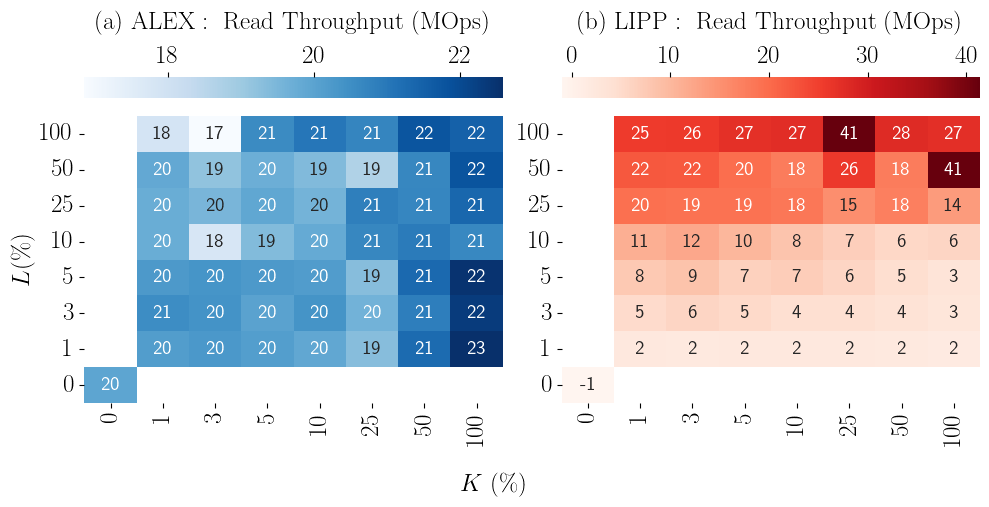

In [23]:
talex = table_bliss.query("index_type == 'alex' and use_preload == 1")
tlipp = table_bliss.query("index_type == 'lipp' and use_preload == 1")

fontsize = 18
set_style(fsz=fontsize)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
value = "read_tp"

for index, df, ax in [("alex", talex, axes[0]), ("lipp", tlipp, axes[1])]:
    heatmap_kwargs = {'annot': True, 'fmt': '.0f', 'cmap': 'Blues'}
    heatmap_kwargs['cmap'] = "Blues" if index == "alex" else "Reds"
    data = df.pivot_table(index='l_pt', columns='k_pt', values=value, aggfunc='mean')
    if index == "lipp":
        data.loc[0, 0] = -1
    sns.heatmap(data, ax=ax, cbar=True, cbar_kws={"location": "top"}, annot_kws={"size": 14}, **heatmap_kwargs)
    ax.invert_yaxis()
    ax.set_ylabel("$L (\%)$", fontsize=fontsize) if index == "alex" else ax.set_ylabel("")
    ax.set_xlabel("", fontsize=fontsize)
    ax.set_xticklabels(data.columns.map(lambda x: f"${x:.0f}$"), fontsize=fontsize)
    ax.set_yticklabels(data.index.map(lambda x: f"${x:.0f}$"), fontsize=fontsize)
    
axes[0].collections[0].colorbar.set_label(r"$\mathrm{(a)\ ALEX:\ Read\ Throughput\ (MOps)}$", labelpad=12, fontsize=fontsize)
axes[1].collections[0].colorbar.set_label(r"$\mathrm{(b)\ LIPP:\ Read\ Throughput\ (MOps)}$", labelpad=12, fontsize=fontsize)
fig.supxlabel("$K\ (\%)$", fontsize=fontsize)
plt.tight_layout()

save_fig(fig, "learned_index_read.pdf")

[[Text(0, 0, 'Sorted'), Text(1, 0, 'Scrambled')],
 Text(0.5, 0, ''),
 Text(0, 0.5, 'Preload Throughput (MQps)')]

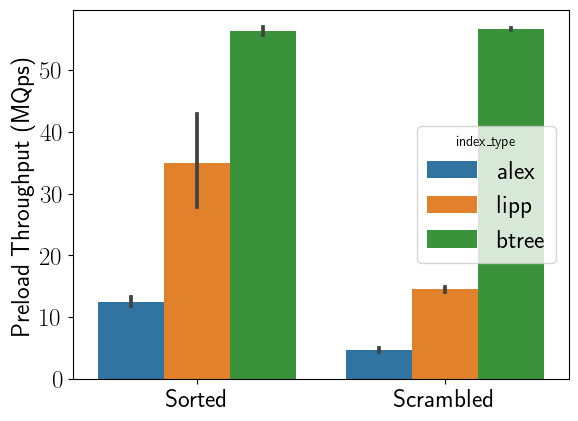

In [24]:
data = table_bliss.query("use_preload == 1 and (l_pt == 0 or l_pt == 100) and (k_pt == 0 or k_pt == 100)")
ax = sns.barplot(data, x="k_pt", y="preload_tp", hue="index_type")
ax.set(xticklabels=["Sorted", "Scrambled"], xlabel="", ylabel="Preload Throughput (MQps)")

/scratchNVM0/ndhuynh/Apps/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


[[Text(0, 0, 'Sorted'), Text(1, 0, 'Scrambled')],
 Text(0.5, 0, ''),
 Text(0, 0.5, 'Write Throughput (MQps)')]

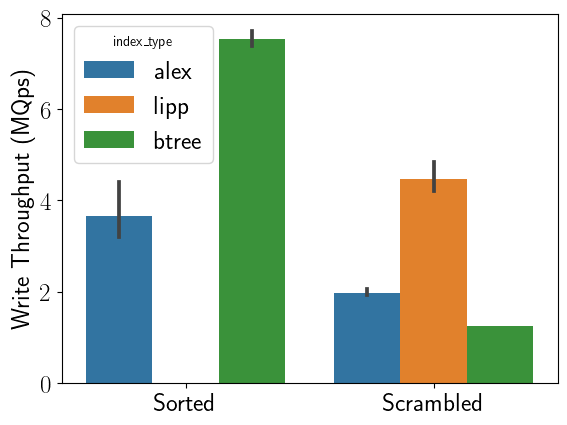

In [25]:
data = table_bliss.query("use_preload == 1 and (l_pt == 0 or l_pt == 100) and (k_pt == 0 or k_pt == 100)")
ax = sns.barplot(data, x="k_pt", y="write_tp", hue="index_type")
ax.set(xticklabels=["Sorted", "Scrambled"], xlabel="", ylabel="Write Throughput (MQps)")